# Практическая работа №1: Основы анализа и моделирования социальных сетей

Выполнил студент гр. 0382 Ильин Денис. Вариант №11

## Цель работы
Овладеть навыками работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.

## Основные теоретические положения

_Актор_ - дискретные индивидуальные, корпоративные или коллективные социальные елиницы.

_Реляционная связь_ - свойство, описывающее взаимодействие между двумя акторами.

_Подгруппа_ - любое подмножество акторов и все связи между ними.

_Социальная сеть_ - объект, представляющий собой совокупность конечного набора (или наборов) акторов и отношения (отношений), определенных на них.

_Граф_ - модель сети с ненаправленным дихотомическим расстоянием.
$$\\cal {G = G(N, L)}$$

**Характеристики сети:**

_Размер сети_ - количество акторов в ней.

_Плотность сети_ - отношение количества существующих и возможных связей.
$$\\Delta = L/C^2_g$$

_Компонента_ - подгруппа, в которой все акторы связаны друг с другом прямо или косвенно.

_Диаметр полной сети_ - наибольшая длина любого из кратчайших путей между всеми парами узлов.

_Степень узла_ - число прямых, инцедентных узлу $n_i$ (для ориентированных - число входящих и выходящих).

_Коэффициент кластеризации_ - отношение количества замкнутых триад к обшему количеству триад.



_Социоматрица_ - матрица $X = \{x_{ij}\}$, где $x_{ij} = 1$,
 если вершины $i$ и $j$ смежны и 0 иначе.

_Алгоритм Фрюхтермана-Рейнгольдса_ - силовой алгоритм укладки сетей.
Идея алгоритма следующая: располагаем вершины в случайных местах экрана,
предполагаем, что на каждую вершину действует две силы:
$F_a(d) = \frac{d^2}{k}$ - сила притяжения, $F_r(d) = - \frac{k^2}{d}$ - сила отталкивания,
где $k = C\cdot\sqrt{area/\#V}$, а $d$ - расстояние между вершинами.
На каждой итерации в зависимости от действия сил вершины смещаются:
величину смещения определяет, в том числе, параметр "температуры",
изначально равный $0.1\cdot area$ и линейно уменьшающийся до нуля.

_Алгоритм Камада-Каваи_ - алгоритм укладки сетей,
основная цель которого состоит в обеспечении соответствия
геометрического расстояния между вершинами на экране и расстояния между ними в графе.
Идея состоит в том, чтобы соединить все вершины пружинами и найти минимум энергии получившейся системы.
Сила пружины рассчитывается как $k_{i,j} = K/d_{i,j}^2$,
где $K$ - некоторая константа, а $d_{i, j}$ - расстояние между вершинами.
Далее на каждой итерации выбирается вершина, которая имеет максимальное значение $\Delta_m = \sqrt{(\frac{\delta E}{\delta x_m})^2 + (\frac{\delta E}{\delta y_m})^2}$,
где $x_m$ и $y_m$ - координаты вершины. Смещение для координат ищется как решение системы дифференциальных уровнений.
Так происходит до тех пор, пока $\Delta_m$ больше заданного $\epsilon$.

_Средняя степень узлов_ - $\overline d = \frac{1}{g}\cdot \sum_{i = 1}^{g}d_i$, где $d_i$ - степень вершины $i$.

_Дисперсия_ - $\frac{1}{g}\cdot \sum_{i = 1}^{g}(d_i - \overline d)^2$.

_Нормированная центральность по степени_ - $C_D^{'} = d_i/(g-1)$.

_Нормированная центральность по близости_ - $C_C^{'} = (g-1)/\sum_{i=1}^g d_{ij}$.

_Нормированная центральность по посредничеству_ - $C_B^{'} = \sum_{s\neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}$,
где $\sigma_{st}$ - количество кратчайших путей из $s$ в $t$, а $\sigma_{st}(v)$ - количество этих путей, проходящих через $v$.

_Нормированная центральность по информации_ - $C_I^{'}(n_i)=\frac{C_I(n_i)}{\sum_{i=1}^{g}C_I(n_i)}$, $C_I(n_i) = (C_{ii} - (T - 2R)/g)^{-1}$,
 где $C = A^{-1}$ ($A = \{a_{ij}\}$, $a_{ii} = 1 +$ степень вершины $i$, $a_{ij} = 0$, если $i$ и $j$ инцидентны и $1$ иначе),
 $T = tr C$, $R = \sum_{j=1}^{g}c_{ij}$.

_Централизация по степени_ - $C_D = \frac{1}{(g-1)(g-2)} \sum_{i=1}^{g}(C_D^{'}(n^*) - C_D^{'}(n_i))$,
где $C_D^{'}(n^*)$ - максимальная центральность по степени.

_Централизация по близости_ - $C_C = \frac{1}{(g-1)(g-2)/(2g - 3)} \sum_{i=1}^{g}(C_C^{'}(n^*) - C_C^{'}(n_i))$,
где $C_C^{'}(n^*)$ - максимальная центральность по близости.

_Централизация по посредничеству_ - $C_B = \frac{1}{g-1} \sum_{i=1}^{g}(C_B^{'}(n^*) - C_B^{'}(n_i))$,
где $С_B^{'}(n^*)$ - максимальная центральность по посредничеству.

_Нормированный престиж по степени_ - $P_D^{'}(n_i) = \frac{x_{+i}}{g-1}$,
где $x_{+i}$ - входная степень вершины.

_Престиж по близости_ $P_P(n_i) = \frac{\#I_i^2}{(g-1)\sum_{n_j \in I_i} d(n_j, n_i)}$,
где $I_i$ - множество вершин, из которых достижима вершины $i$.

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей вычислить описательные характеристики. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

0. Импортируем библиотеки.

In [140]:
import pandas as pd
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

1. Из файла florentine_business.csv извлечь социоматрицу с помощью соответствующих функций.
 Вывести полученную социоматрицу на экран.

In [141]:
sm = pd.read_csv('doc/florentine_business.csv', skiprows=2, header=None, delimiter=', ', engine='python')
sm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
7,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
8,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


2. Преобразовать социоматрицу в список рёбер. Вывести первые 5 элементов списка рёбер

In [142]:
nx.to_pandas_edgelist(nx.from_pandas_adjacency(sm)).head()

,source,target,weight
0,2,4,1
1,2,5,1
2,2,8,1
3,2,10,1
4,3,6,1


3. Присвоить имена столбцам и строкам социоматрицы (имена – первая строка в csv-файле после комментариев).

In [143]:
names = pd.read_csv('doc/florentine_business.csv', skiprows=1, nrows=1, delimiter=', ', engine='python').columns
sm.columns = names
sm.index = names
sm

,Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
Acciaiuoli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Albizzi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Barbadori,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0
Bischeri,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
Castellani,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
Ginori,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
Guadagni,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
Lamberteschi,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
Medici,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
Pazzi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


4. С помощью соответствующих функций по полученной социоматрице построить ненаправленную сеть.
Объяснить параметры, передаваемые в функцию.

In [180]:
net = nx.from_pandas_adjacency(sm)

Параметры:
* социоматрица, по которой строится сеть

5. Отобразить сеть с помощью алгоритмов укладки Фрюхтермана–
Рейнгольда и Камада–Каваи. Объяснить, в чём различие между
алгоритмами и укладками.

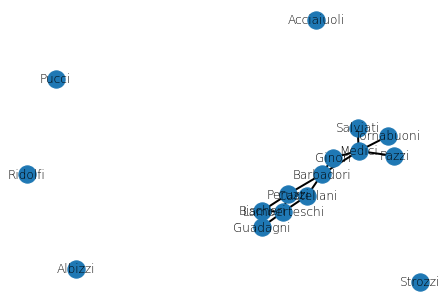

In [146]:
nx.draw_spring(net, with_labels=True, width=2, font_weight=10)

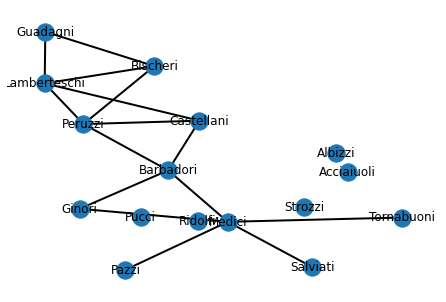

In [147]:
nx.draw_kamada_kawai(net, with_labels=True, width=2)

Объяснение различий:
 Алгорим Камада-Кавай пытается привести систему пружин в такое состояние, что минимизация энергии системы соответствует минимизации разницы сежду Евклидовым расстоянием и расстоянием по графу. Алгоритм укладки Фрюхтермана–Рейнгольда также учитывает силу притяжения ребер, в то время как Камада–Каваи лишь расстояние между вершинами (настройка пружинной системы). Из-за этого первая укладка получается более плотной и некоторые вершины далеко уходят от основного графа, уменьшая площадь для него.

6. Вывести «описательную сводку» сети.

In [148]:
print(nx.info(net), '\n')
for name in names:
    print(nx.info(net, name), '\n')

Graph with 16 nodes and 15 edges 

Node Acciaiuoli has the following properties:
Degree: 0
Neighbors:  

Node Albizzi has the following properties:
Degree: 0
Neighbors:  

Node Barbadori has the following properties:
Degree: 4
Neighbors: Castellani Ginori Medici Peruzzi 

Node Bischeri has the following properties:
Degree: 3
Neighbors: Guadagni Lamberteschi Peruzzi 

Node Castellani has the following properties:
Degree: 3
Neighbors: Barbadori Lamberteschi Peruzzi 

Node Ginori has the following properties:
Degree: 2
Neighbors: Barbadori Medici 

Node Guadagni has the following properties:
Degree: 2
Neighbors: Bischeri Lamberteschi 

Node Lamberteschi has the following properties:
Degree: 4
Neighbors: Bischeri Castellani Guadagni Peruzzi 

Node Medici has the following properties:
Degree: 5
Neighbors: Barbadori Ginori Pazzi Salviati Tornabuoni 

Node Pazzi has the following properties:
Degree: 1
Neighbors: Medici 

Node Peruzzi has the following properties:
Degree: 4
Neighbors: Barbador

7. Вычислить «пятичисловую сводку» сети:
Размер сети равен количеству вершин ($16$). 

Для неориентированных сетей плотность равна $$\varDelta = \frac{L}{(_2^g)} = \frac{15}{(_2^{16})} = \frac{15*2}{15*16} = \frac18 = .125$$

На графе легко заметить $6$ компонент связности(одну большую компоненту связности и $5$ изолированных вершин). 

Наибольшее кратчайшее расстояние = $5$. 

#Закрытых треугольников = $5$.

#Открытых и закрытых треугольников = $12$. 

Исходя извышесказанного коэффициент кластеризации равен $\\frac{5}{12} = .41(6)$.

Теоритические результаты аналогичны практическим, представленным ниже.
    

Малая плотность показывает, что акторы мало взаимодействуют друг с другом, а относительно большое количество компонент показывает, что есть пары акторов, которые никак не связаны друг с другом. Малую связность подтверждает и диаметр, ведь если бы акторы были более связаны друг с другом, то и максимальное кратчайщее расстояние между парами было бы меньше. Полученный коэффициент кластеризации показывает среднию тенденцию к образованию транзитивных связей между акторами, то есть не факт, что два актора, имеющие связь с третьим, будут связаны друг с другом.

Практические результаты:

In [149]:
print("Размер сети:", net.number_of_nodes())
print("Плотность сети:", nx.density(net))
print("Число компонент:", nx.number_connected_components(net))
print("Диаметр сети:", max(nx.diameter(nx.subgraph(net, component)) for component in nx.connected_components(net)))
print("Коэффициент кластеризации:", nx.transitivity(net))

Размер сети: 16
Плотность сети: 0.125
Число компонент: 6
Диаметр сети: 5
Коэффициент кластеризации: 0.4166666666666667


8. Вычислить среднюю степень узлов и дисперсию.

In [150]:
print("Средняя степень:", sum(deg for _, deg in net.degree) / net.number_of_nodes())
print("Дисперсия:", sum((deg - avg_deg) ** 2 for _, deg in net.degree) / net.number_of_nodes())

Средняя степень: 1.875
Дисперсия: 2.859375


9. Заполнить таблицу для различных мер центральности. Примечание: меры центральности вычислить для неизолированных вершин.
Сделать выводы.

In [151]:
c = {name: [] for name in names}
measures_of_centrality = {x: [] for x in names}
v = nx.connected_components(net)
next(v)
next(v)
component = nx.subgraph(net, next(v))
for name, val in nx.degree_centrality(component).items():
    c[name].append(val)
for name, val in nx.closeness_centrality(component).items():
    c[name].append(val)
for name, val in nx.betweenness_centrality(component).items():
    c[name].append(val)
for name, val in nx.information_centrality(component).items():
    c[name].append(val)
data = {name: lst for name, lst in c.items() if lst}
df = pd.DataFrame(data=data).T
df.columns = ['Сd', 'Сc', 'Сb', 'Сi']
df

,Сd,Сc,Сb,Сi
Barbadori,0.4,0.588235,0.555556,0.091769
Bischeri,0.3,0.400000,0.055556,0.065606
Castellani,0.3,0.500000,0.111111,0.077103
Ginori,0.2,0.454545,0.000000,0.070273
Guadagni,0.2,0.312500,0.000000,0.056449
Lamberteschi,0.4,0.416667,0.133333,0.072527
Medici,0.5,0.526316,0.533333,0.081764
Pazzi,0.1,0.357143,0.000000,0.047102
Peruzzi,0.4,0.526316,0.300000,0.080488
Salviati,0.1,0.357143,0.000000,0.047102


По мере центральности самой важной является Medici, по остальным параметрам Barbadori.

10. Вычислить значение централизации для каждой меры. Сделать выводы.

In [85]:
C_d = sum(max(df['Сd']) - df['Сd']) / (g - 1) / (g - 2)
C_c = sum(max(df['Сc']) - df['Сc']) / (g - 1) / (g - 2) * (2 * g - 3)
C_b = sum(max(df['Сb']) - df['Сb']) / (g - 1)
C_i = sum((df['Сi'] - sum(df['Сi'])) ** 2) / g

print(f"Централизация по степени: {C_d}")
print(f"Централизация по близости: {C_c}")
print(f"Централизация по посредничеству: {C_b}")
print(f"Централизация по информации: {C_i}")

Централизация по степени: 0.011904761904761902
Централизация по близости: 0.2312516162764947
Централизация по посредничеству: 0.29481481481481475
Централизация по информации: 0.30901199095736087


Вывод - cеть меньше всего централизована по степени и больше всего по информации.

11. Выявить точки сочленения и мосты сети. Подтвердить свои догадки с помощью соответствующих функций (если их нет – реализуйте
их самостоятельно). Построить график сети, на котором выделены
точки сочленения и мосты.

Судя по графику, мостами являются ребра,
которые соединяют Medici с Pazzi, Salviati, Tornabuoni,
а точками сочленения являются Medici и Barbadori.

Tочки сочленения: ['Medici', 'Barbadori']
Mосты: [('Medici', 'Pazzi'), ('Medici', 'Salviati'), ('Medici', 'Tornabuoni')]


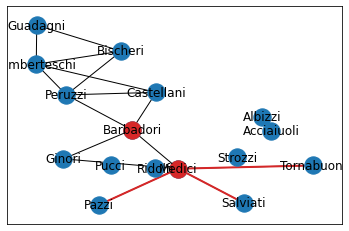

In [155]:
art_points = [x for x in nx.articulation_points(net)]
bridges = [x for x in nx.bridges(net)]
pos = nx.kamada_kawai_layout(net)

nx.draw_networkx_nodes(net, pos)
nx.draw_networkx_nodes(net, pos, nodelist=art_points, node_color="tab:red")
nx.draw_networkx_edges(net, pos)
nx.draw_networkx_edges(net, pos, edgelist=bridges, edge_color="tab:red", width=2)
nx.draw_networkx_labels(net, pos, {name: name for name in names})

print("Tочки сочленения:", art_points)
print("Mосты:", bridges)

12. Выполнить п. 2–8 для направленной сети из файла krackhardt_advice.csv.

12.1 Извлечь социоматрицу, вывести её на экран.

In [159]:
sm = pd.read_csv('doc/krackhardt_advice.csv', skiprows=2, header=None, delimiter=', ', engine='python')
sm

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,0,1,0,1,1,1,1,1,...,1,0,1,0,0,1,1,0,1,1
3,1,1,0,0,0,1,0,1,0,1,...,1,0,0,0,1,1,1,0,1,1
4,1,1,0,0,0,1,1,1,0,1,...,0,1,1,0,1,1,1,1,1,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,1,0,0,1
7,0,1,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
8,1,1,0,0,0,1,1,1,0,1,...,1,0,1,0,1,1,1,0,0,1
9,1,1,1,1,1,0,0,1,0,0,...,0,1,0,1,1,1,1,1,1,0


12.2. Преобразовать социоматрицу в список рёбер. Вывести первые 5 элементов списка рёбер

In [160]:
nx.to_pandas_edgelist(nx.from_pandas_adjacency(sm)).head()

,source,target,weight
0,0,1,1
1,0,3,1
2,0,7,1
3,0,15,1
4,0,17,1


12.3. Присвоить имена столбцам и строкам социоматрицы.

In [183]:
names = [i for i in range(1, len(sm)+1)]
sm.columns = names
sm.index = names
sm

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
1,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,1,0,1,1,1,1,1,...,1,0,1,0,0,1,1,0,1,1
4,1,1,0,0,0,1,0,1,0,1,...,1,0,0,0,1,1,1,0,1,1
5,1,1,0,0,0,1,1,1,0,1,...,0,1,1,0,1,1,1,1,1,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,1,0,0,1
8,0,1,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
9,1,1,0,0,0,1,1,1,0,1,...,1,0,1,0,1,1,1,0,0,1
10,1,1,1,1,1,0,0,1,0,0,...,0,1,0,1,1,1,1,1,1,0


* Их нет

12.4. С помощью соответствующих функций по полученной социоматрице построить направленную сеть.
Объяснить параметры, передаваемые в функцию.

In [161]:
net = nx.from_pandas_adjacency(sm, create_using=nx.DiGraph)

Параметры: 
* социоматрица, по которой строится сеть 
* конструктор направленной сети

12.5. Отобразить сеть с помощью алгоритмов укладки Фрюхтермана–
Рейнгольда и Камада–Каваи. Объяснить, в чём различие между
алгоритмами и укладками.

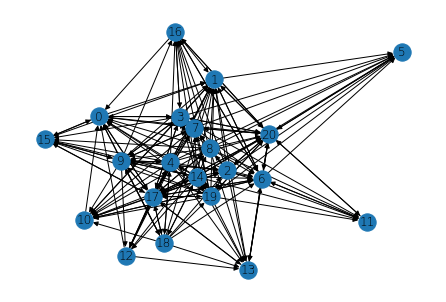

In [122]:
nx.draw_spring(net, with_labels=True, font_weight=10)

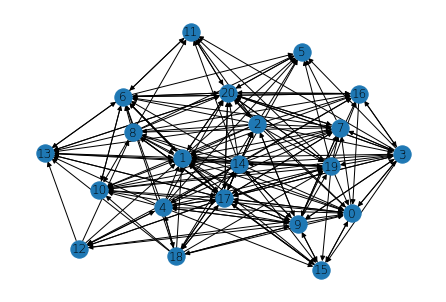

In [126]:
nx.draw_kamada_kawai(net, with_labels=True, font_weight=10)

12.6. Вывести «описательную сводку» сети.

In [162]:
print(nx.info(net), '\n')
for i in range(nx.number_of_nodes(net)):
    print(f"Node 0 has the following properties:")
    print(f"In degree: {net.in_degree(i)}")
    print(f"Out degree: {net.out_degree(i)}")
    print(f"Predecessors: {list(net.predecessors(i))}")
    print(f"Successors: {list(net.successors(i))}")
    print("\n")

DiGraph with 21 nodes and 190 edges 

Node 0 has the following properties:
In degree: 13
Out degree: 6
Predecessors: [2, 3, 4, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19]
Successors: [1, 3, 7, 15, 17, 20]


Node 0 has the following properties:
In degree: 18
Out degree: 3
Predecessors: [0, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Successors: [5, 6, 20]


Node 0 has the following properties:
In degree: 5
Out degree: 15
Predecessors: [9, 14, 17, 18, 20]
Successors: [0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 13, 16, 17, 19, 20]


Node 0 has the following properties:
In degree: 8
Out degree: 12
Predecessors: [0, 2, 7, 9, 14, 16, 17, 20]
Successors: [0, 1, 5, 7, 9, 10, 11, 15, 16, 17, 19, 20]


Node 0 has the following properties:
In degree: 5
Out degree: 15
Predecessors: [9, 12, 14, 17, 18]
Successors: [0, 1, 5, 6, 7, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20]


Node 0 has the following properties:
In degree: 10
Out degree: 1
Predecessors: [1, 2, 3, 4, 6, 7, 8, 14, 19, 20]
Successors: [20]


12.7. Вычислить «пятичисловую сводку» сети:

 Размер сети равен количеству вершин - $21$. Для ориентированных сетей плотность равна $$\varDelta = \frac{L}{A_g^2} = \frac{190}{A_21^{2}} = \frac{190}{20*21} = \frac{19}{42} = .452...$$ В графе есть всего одна компонента связности. Диаметр такой сети на глаз определить тяжело, как и коэффициент кластеризации. Все величины вычисляются ниже.

 Средняя плотность показывает, что акторы более-менее взаимодействуют друг с другом, а число компонент равное единице показывает, что все акторы связаны друг с другом через цепочку \"рукопожатий\". Относительно среднюю подтверждает и диаметр, ведь для связи люьых двух акторов требуется не больше 3-х \"рукопожатий\". Полученный коэффициент кластеризации показывает среднию тенденцию к образованию транзитивных связей между акторами, то есть не факт, что два актора, имеющие связь с третьим, будут связаны друг с другом.
   
     

In [170]:
print("Количество рёбер:", net.number_of_edges())
print("\nРазмер сети:", net.number_of_nodes())
print("Плотность сети:", nx.density(net))
print("Число компонент:", nx.number_strongly_connected_components(net))
print("Диаметр сети:", max(nx.diameter(nx.subgraph(net, component)) for component in nx.strongly_connected_components(net)))
print("Коэффициент кластеризации:", nx.transitivity(net))

Количество рёбер: 190

Размер сети: 21
Плотность сети: 0.4523809523809524
Число компонент: 1
Диаметр сети: 3
Коэффициент кластеризации: 0.4651600753295669


12.8. Вычислить среднюю степень узлов и дисперсию. Сделать выводы.

In [172]:
avg_deg_in = sum(deg for _, deg in net.in_degree) / net.number_of_nodes()
avg_deg_out = sum(deg for _, deg in net.out_degree) / net.number_of_nodes()
disp_in = sum((deg - avg_deg_in) ** 2 for _, deg in net.in_degree) / net.number_of_nodes()
disp_out = sum((deg - avg_deg_out) ** 2 for _, deg in net.out_degree) / net.number_of_nodes()
print(f"Средняя степень входящих ребер: {avg_deg_in}, исходящих: {avg_deg_out}.")
print(f"Дисперсия входящих ребер: {disp_in}, исходящих: {disp_out}.")

Средняя степень входящих ребер: 9.047619047619047, исходящих: 9.047619047619047.
Дисперсия входящих ребер: 15.75963718820862, исходящих: 28.331065759637195.


* B среднем акторы имеют 9 входящих и 9 исходящих связей.
* Дисперсия показывает, что действительное значение для каждого актора может достаточно отличаться.

13. Заполнить таблицу для различных мер престижа.

In [179]:
def I_i(n_i, net):
    return [node for node in net.nodes if nx.has_path(net, node, n_i)]

c = {node: [] for node in net.nodes}

for name, val in {n_i: net.in_degree(n_i) / (g - 1) for n_i in net.nodes}.items():
    c[name].append(val)

for n_i in net.nodes:
    I = I_i(n_i, net)
    c[n_i].append(len(I) ** 2 / (g - 1) / sum(nx.shortest_path_length(net, n_j, n_i) for n_j in I))

data = {name: lst for name, lst in c.items() if lst}
df = pd.DataFrame(data=data).T
df.columns = ['P_d', 'P_p']
df

,P_d,P_p
0,0.866667,0.980000
1,1.200000,1.336364
2,0.333333,0.816667
3,0.533333,0.918750
4,0.333333,0.735000
5,0.666667,0.980000
6,0.866667,1.088889
7,0.666667,0.980000
8,0.266667,0.717073
9,0.600000,0.840000


Вывод: самым важным по всем мерам престижа является менеджер с номером 1.


## Выводы

По результатам практической работы были получены навыки работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей. Была изучена на практике теория анализа социальных сетей: представление сетей, анализ характеристик, анализ важности акторов и групп. Так же с помощью математических пакетов на практике была изучена разница между алгоритмами укладки сетей, если точнее, то - Фрюхтермана–Рейнгольда и Камада–Каваи, разница между мерами престижа и центральности, разница между направленными и ненаправленными сетями.

Работа выполнялась при помощи языка Python с использованием библиотек Pandas и NetworkX.

В итоге были получены навыки работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.